In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)         # controls default text sizes

data = pd.read_csv('test_log.monitor.csv', header=1)

data.policy_kwargs.replace({"{'net_arch': [{'pi': [10, 10], 'vf': [10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10)',
       "{'net_arch': [{'pi': [10, 10, 10], 'vf': [10, 10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10, 10)',
       "{'net_arch': [{'pi': [50, 50], 'vf': [50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50)',
       "{'net_arch': [{'pi': [50, 50, 50], 'vf': [50, 50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50, 50)'}, inplace=True)

data.head(1)

,r,l,t,step,player mass,player max mass,blobs,agars,learning_rate,policy_kwargs
0,1.993,100,1.715,100,21.293152,21.993,248,1,0.001,"(10, 10)"


In [33]:
data.groupby(['policy_kwargs', 'learning_rate']).max()

r     l             t  step  \
policy_kwargs learning_rate                                         
(10, 10)      0.00001        204.949317  3000  18697.697976  3000   
              0.00010        222.018560  3000  10186.206467  3000   
              0.00100        222.011606  3000   1968.519456  3000   
(10, 10, 10)  0.00001        210.879903  3000  21098.803976  3000   
              0.00010        221.972485  3000  12352.061962  3000   
              0.00100        222.018531  3000   4116.114472  3000   
(50, 50)      0.00001        218.290811  3000  23261.749975  3000   
              0.00010        222.070842  3000  14307.644963  3000   
              0.00100        222.070842  3000   6077.252472  3000   
(50, 50, 50)  0.00001        220.749434  3000  25550.931975  3000   
              0.00010        222.071442  3000  16449.813962  3000   
              0.00100        221.978918  3000   8211.083472  3000   

                             player mass  player max mass  blobs  agars  
policy_kwargs learning_rate                                              
(10, 10)      0.00001         162.272907       224.949317    248      2  
              0.00010         151.669570       242.018560    248      2  
              0.00100         179.145905       242.011606    248      2  
(10, 10, 10)  0.00001         157.324537       230.879903    248      2  
              0.00010         156.476729       241.972485    248      2  
              0.00100         148.734659       242.018531    248      2  
(50, 50)      0.00001         162.139730       238.290811    248      2  
              0.00010         167.284966       242.070842    248      2  
              0.00100         194.875881       242.070842    248      2  
(50, 50, 50)  0.00001         162.045601       240.749434    248      2  
              0.00010         153.588709       242.071442    248      2  
              0.00100         114.036235       241.978918    248      2

In [17]:
data[(data.learning_rate == lr) & (data.policy_kwargs == pkw)]['player max mass'].

7880     21.993000
7881     23.917802
7882     24.626013
7883     32.466142
7884     21.993000
           ...    
8593     37.397628
8594    240.749434
8595     54.893117
8596    240.355339
8597     39.657062
Name: player max mass, Length: 718, dtype: float64

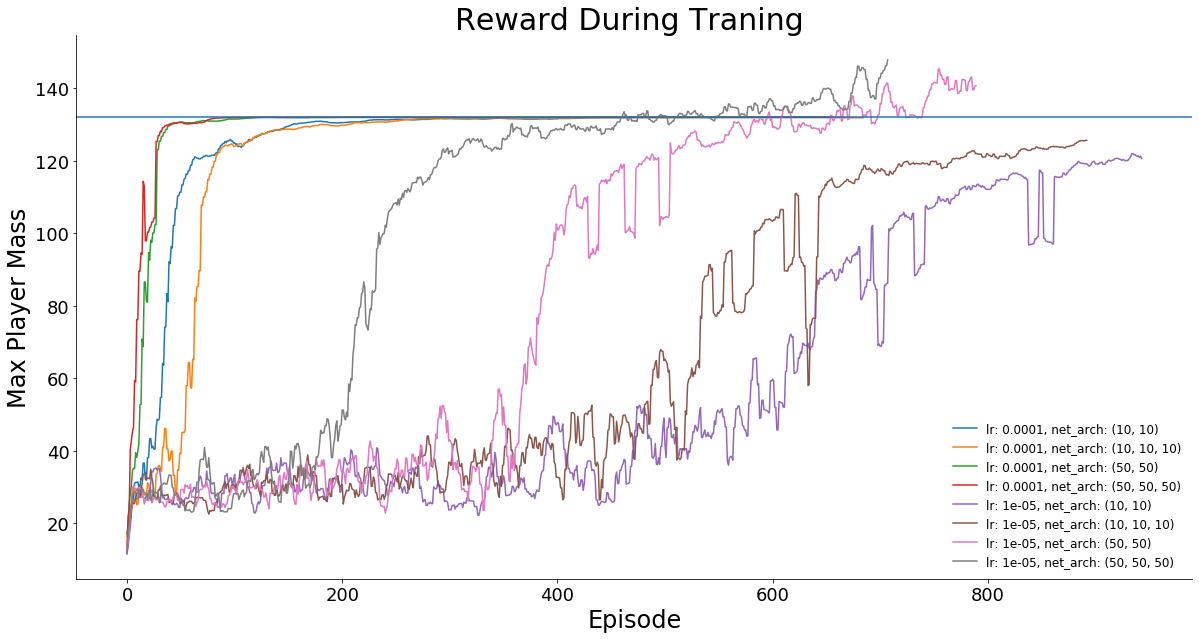

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))

MAX_EP_REWARD = 242.07084202773154

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

for lr in data.learning_rate.unique():
    if lr < 0.001:
        for pkw in data.policy_kwargs.unique():
            reward = data[(data.learning_rate == lr) & (data.policy_kwargs == pkw)].reset_index()['player max mass']
            smooth_param = 10
            ax.plot(smooth(reward, smooth_param)[:-smooth_param], label=f'lr: {lr}, net_arch: {pkw}')
        
plt.axhline((MAX_EP_REWARD + 21.93) / 2)
plt.legend(frameon=False, fontsize=12)
        
ax.set_xlabel('Episode', fontsize=MED)
ax.set_ylabel('Max Player Mass', fontsize=MED)
ax.set_title('Reward During Traning ', fontsize=LARGE)
sns.despine()
plt.savefig('reward.png', dpi=2*fig.dpi)
plt.show()

In [41]:
net_arch [(30, 30, 30), (50, 50, 50), (100, 100, 100), (50, 50, 50, 50), (100, 100, 100, 100)]
lrs [1e-05, 1e-04, 1e-06, 1e-07]

NameError: name 'net_arch' is not defined